# Titanic Dataset
Using Logistic Regression Algorithm to find whether person survived or not in Titanic ship

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')

# Exploratory Data Analysis
Lets begin with some exploratory data analysis to see the missin values

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

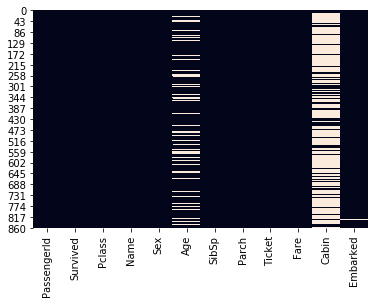

In [8]:
sns.heatmap(train.isnull(), cbar = False) 

Shows missing data in the dataset. Here Age and Cabin has many missing data.

Lets us continue on visualizing some more about the data.

In [9]:
sns.set_style('darkgrid')

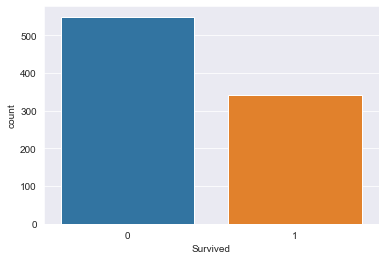

In [10]:
sns.countplot(x = 'Survived', data = train)

Here we can see that the number of deaths(0) is more than the number of survival(1).

Now let us see the proportion of male and female survival.

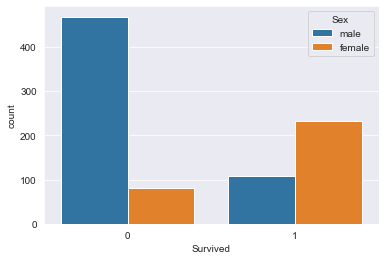

In [11]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train)

We can see that female survival is more than male and also male deaths are much higher than female.

Now let us see Passenger class-wise survival and deaths.

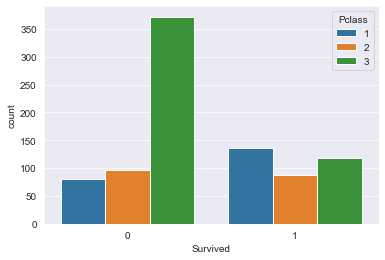

In [12]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)

Here, it is clear that no. of deaths in class-3 is highest and the no. of survival in class-1 is the highest.

Now lets see the distribution of age in the dataset.

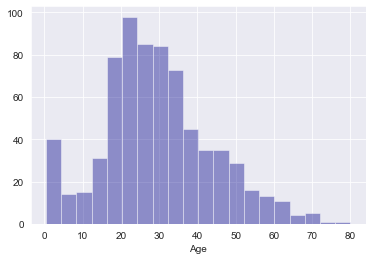

In [13]:
sns_plot = sns.distplot(train['Age'].dropna(), kde = False, color = 'darkblue')
sns_plot.figure.savefig('Titanic_Ages_pasenger.png') # saving figure in seaborn

Here large number of passenger between age-group 20 and 35 were present.

The above plot shows a normal distribution of the ages.

We want to fill the missing values of age rather than just dropping the missing age record because age may play an important
role analysis of the data.

Instead of replacing the age values with mean we can replace this with Passenger class-wise average ages.

Lets see using boxplot to find out the average/median ages of different Passenger classes.

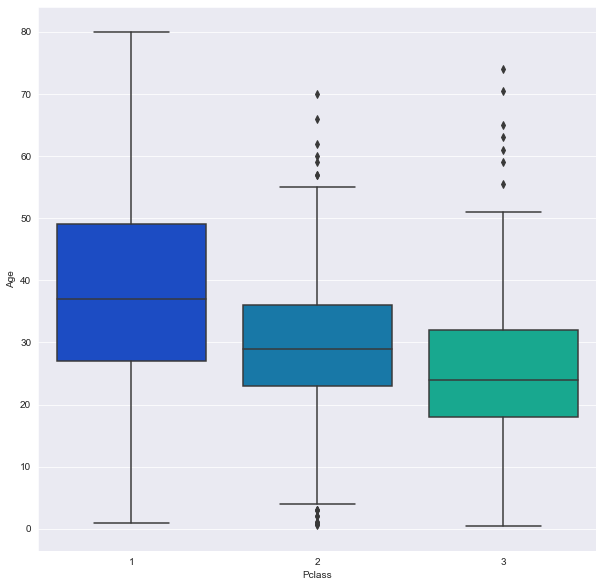

In [14]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette = 'winter')

It is clear that class-1 has a median age of 37, for class-2 it is 29 and for class-3 it is 24.

So now its time to replace the missing age values with these values.

Using np.select function to replace the missing values

In [15]:
conditions = [
    (train['Age'].isnull()) & (train['Pclass'] == 1),
    (train['Age'].isnull()) & (train['Pclass'] == 2),
    (train['Age'].isnull()) & (train['Pclass'] == 3)]
choices = [37, 29, 24]
train['Age'] = np.select(conditions, choices, default = train['Age'].values)

In [16]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Now lets check the heatmap again.

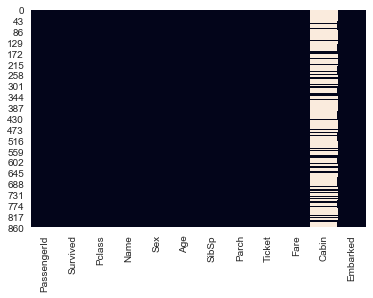

In [17]:
sns.heatmap(train.isnull(), cbar=False)

Here we can see that after replacing the missing values for ages there are no null values for Age column left in the dataset.



In [18]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
train['Embarked'].fillna('S', inplace = True)   # Replacing NaN values with most frequent item i.e. 'S'
train['Embarked'].values

array(['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C', 'S', 'S', 'S',
       'S', 'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'Q', 'S', 'S', 'S',
       'C', 'S', 'Q', 'S', 'C', 'C', 'Q', 'S', 'C', 'S', 'C', 'S', 'S',
       'C', 'S', 'S', 'C', 'C', 'Q', 'S', 'Q', 'Q', 'C', 'S', 'S', 'S',
       'C', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'C',
       'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'C', 'S', 'S', 'C', 'S', 'Q',
       'S', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'Q', 'S', 'C', 'S',
       'C', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'S', 'S',
       'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C',
       'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Using Logistic Regression Algorithm to find whether survived or not

Before applying model we require to encode the categorical-ordinal data like Sex, Embarked to numerical data.

So here we apply OneHotEncoder technique to encode the categorical-ordinal values.

In [21]:
train = pd.get_dummies(train, columns = ['Sex', 'Embarked'])

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


Now we apply Logistic Regression on the dataset to find survival(target), taking :

X as the idependent variables set 

Y as the dependent variable, which is 'Survived' in this case.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
cols = ['PassengerId','Name', 'Ticket', 'Cabin']
X = train.drop(cols, axis = 1) # Dropping the columns with categorical-nominal data.
y = train['Survived']

In [25]:
X.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state = 0)

In [27]:
X_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
857,1,1,51.0,0,0,26.5500,0,1,0,0,1
52,1,1,49.0,1,0,76.7292,1,0,1,0,0
386,0,3,1.0,5,2,46.9000,0,1,0,0,1
124,0,1,54.0,0,1,77.2875,0,1,0,0,1
578,0,3,24.0,1,0,14.4583,1,0,1,0,0


In [28]:
y_train.head()

857    1
52     1
386    0
124    0
578    0
Name: Survived, dtype: int64

In [29]:
X_test.shape
y_test.shape

(268,)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\SOUVIK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_predict = logreg.predict(X_test)

In [33]:
dict = {'y_Actual':y_test, 'y_Predicted':y_predict}
df = pd.DataFrame(dict).reset_index()
df

,index,y_Actual,y_Predicted
0,495,0,0
1,648,0,0
2,278,0,0
3,31,1,1
4,255,1,1
...,...,...,...
263,263,0,0
264,718,0,0
265,620,0,0
266,786,1,1


In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
cnf = confusion_matrix(y_test, y_predict)
cnf

array([[168,   0],
       [  0, 100]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report

In [37]:
print('Report:')
print(classification_report(y_test, y_predict))

Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           1       1.00      1.00      1.00       100

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



Here, we can see that accuracy is 100%.

Each test data is correctly identified by the Model.